In [203]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import choroplethNYC as cp
import shapely
import pylab as pl
%matplotlib inline

In [35]:
data = pd.read_csv('geo_housing.csv')
data.head()

,Unnamed: 0,Unnamed: 0.1,unit,status,no_rooms,no_bath,area(ftsq),id,date,price,...,transp2,transp3,transp4,transp5,units,stories,year,latitude,longitude,postcode
0,0,0,#3,"Off-Market,rent",0.0,1,NaN,73971,10/12/2010,1650.0,...,Qat 86th Street 0.22 miles,456at 86th St 0.26 miles,Qat 72nd Street 0.48 miles,6at 68th St 0.66 miles,1 unit,3 stories,Built in 1925,40.775707,-73.957205,10028
1,1,1,#1,"Off-Market,rent",2.0,1,"1,100",786613,10/18/2018,5995.0,...,Lat 3rd Av 0.45 miles,Fat 2nd Av 0.52 miles,6at Astor Place 0.52 miles,NRWat 8th St 0.61 miles,5 units,4 stories,Built in 1900,40.727683,-73.981419,10009
2,2,2,#3,"Off-Market,rent",2.0,1,"1,200",786613,02/15/2011,5400.0,...,Lat 3rd Av 0.45 miles,Fat 2nd Av 0.52 miles,6at Astor Place 0.52 miles,NRWat 8th St 0.61 miles,5 units,4 stories,Built in 1900,40.727683,-73.981419,10009
3,3,3,#5,"Off-Market,rent",2.0,1,"1,200",786613,11/20/2013,5200.0,...,Lat 3rd Av 0.45 miles,Fat 2nd Av 0.52 miles,6at Astor Place 0.52 miles,NRWat 8th St 0.61 miles,5 units,4 stories,Built in 1900,40.727683,-73.981419,10009
4,4,4,#2,rent,2.0,1,"1,200",786613,NaN,6500.0,...,Lat 3rd Av 0.45 miles,Fat 2nd Av 0.52 miles,6at Astor Place 0.52 miles,NRWat 8th St 0.61 miles,5 units,4 stories,Built in 1900,40.727683,-73.981419,10009


In [36]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'unit', 'status', 'no_rooms', 'no_bath',
       'area(ftsq)', 'id', 'date', 'price', 'bldname', 'address', 'type',
       'top_amenity', 'amenities', 'transp1', 'transp2', 'transp3', 'transp4',
       'transp5', 'units', 'stories', 'year', 'latitude', 'longitude',
       'postcode'],
      dtype='object')

In [47]:
df = data.drop(['Unnamed: 0', 'Unnamed: 0.1'],axis=1)

In [48]:
df.head()

,unit,status,no_rooms,no_bath,area(ftsq),id,date,price,bldname,address,...,transp2,transp3,transp4,transp5,units,stories,year,latitude,longitude,postcode
0,#3,"Off-Market,rent",0.0,1,NaN,73971,10/12/2010,1650.0,Building: 162 East 81st Street,"162 East 81st Street, New York, NY, 10028",...,Qat 86th Street 0.22 miles,456at 86th St 0.26 miles,Qat 72nd Street 0.48 miles,6at 68th St 0.66 miles,1 unit,3 stories,Built in 1925,40.775707,-73.957205,10028
1,#1,"Off-Market,rent",2.0,1,"1,100",786613,10/18/2018,5995.0,House: 307 East 10th Street,"307 East 10th Street, New York, NY, 10009",...,Lat 3rd Av 0.45 miles,Fat 2nd Av 0.52 miles,6at Astor Place 0.52 miles,NRWat 8th St 0.61 miles,5 units,4 stories,Built in 1900,40.727683,-73.981419,10009
2,#3,"Off-Market,rent",2.0,1,"1,200",786613,02/15/2011,5400.0,House: 307 East 10th Street,"307 East 10th Street, New York, NY, 10009",...,Lat 3rd Av 0.45 miles,Fat 2nd Av 0.52 miles,6at Astor Place 0.52 miles,NRWat 8th St 0.61 miles,5 units,4 stories,Built in 1900,40.727683,-73.981419,10009
3,#5,"Off-Market,rent",2.0,1,"1,200",786613,11/20/2013,5200.0,House: 307 East 10th Street,"307 East 10th Street, New York, NY, 10009",...,Lat 3rd Av 0.45 miles,Fat 2nd Av 0.52 miles,6at Astor Place 0.52 miles,NRWat 8th St 0.61 miles,5 units,4 stories,Built in 1900,40.727683,-73.981419,10009
4,#2,rent,2.0,1,"1,200",786613,NaN,6500.0,House: 307 East 10th Street,"307 East 10th Street, New York, NY, 10009",...,Lat 3rd Av 0.45 miles,Fat 2nd Av 0.52 miles,6at Astor Place 0.52 miles,NRWat 8th St 0.61 miles,5 units,4 stories,Built in 1900,40.727683,-73.981419,10009


In [49]:
df['lonlat'] = list(zip(df.longitude, df.latitude))
#generate a "geometry" column
df['geometry'] = df[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))

In [53]:
df = gpd.GeoDataFrame(df, geometry='geometry')
df.head()

,unit,status,no_rooms,no_bath,area(ftsq),id,date,price,bldname,address,...,transp4,transp5,units,stories,year,latitude,longitude,postcode,lonlat,geometry
0,#3,"Off-Market,rent",0.0,1,NaN,73971,10/12/2010,1650.0,Building: 162 East 81st Street,"162 East 81st Street, New York, NY, 10028",...,Qat 72nd Street 0.48 miles,6at 68th St 0.66 miles,1 unit,3 stories,Built in 1925,40.775707,-73.957205,10028,"(-73.957205, 40.775707)",POINT (-73.95720500000002 40.775707)
1,#1,"Off-Market,rent",2.0,1,"1,100",786613,10/18/2018,5995.0,House: 307 East 10th Street,"307 East 10th Street, New York, NY, 10009",...,6at Astor Place 0.52 miles,NRWat 8th St 0.61 miles,5 units,4 stories,Built in 1900,40.727683,-73.981419,10009,"(-73.9814192, 40.7276833)",POINT (-73.98141919999998 40.7276833)
2,#3,"Off-Market,rent",2.0,1,"1,200",786613,02/15/2011,5400.0,House: 307 East 10th Street,"307 East 10th Street, New York, NY, 10009",...,6at Astor Place 0.52 miles,NRWat 8th St 0.61 miles,5 units,4 stories,Built in 1900,40.727683,-73.981419,10009,"(-73.9814192, 40.7276833)",POINT (-73.98141919999998 40.7276833)
3,#5,"Off-Market,rent",2.0,1,"1,200",786613,11/20/2013,5200.0,House: 307 East 10th Street,"307 East 10th Street, New York, NY, 10009",...,6at Astor Place 0.52 miles,NRWat 8th St 0.61 miles,5 units,4 stories,Built in 1900,40.727683,-73.981419,10009,"(-73.9814192, 40.7276833)",POINT (-73.98141919999998 40.7276833)
4,#2,rent,2.0,1,"1,200",786613,NaN,6500.0,House: 307 East 10th Street,"307 East 10th Street, New York, NY, 10009",...,6at Astor Place 0.52 miles,NRWat 8th St 0.61 miles,5 units,4 stories,Built in 1900,40.727683,-73.981419,10009,"(-73.9814192, 40.7276833)",POINT (-73.98141919999998 40.7276833)


In [162]:
pumashp = gpd.GeoDataFrame.from_file('geo_export_3ed16d80-636f-4c8c-8202-06fbf40b97be.shp')

In [163]:
pumashp

,puma,shape_area,shape_leng,geometry
0,3701,9.792852e+07,53227.144461,POLYGON ((-73.89641133483133 40.90450452082026...
1,3702,1.889860e+08,106050.002302,"POLYGON ((-73.8442314689986 40.86942035096838,..."
2,3703,2.670137e+08,304071.257466,(POLYGON ((-73.78833349834532 40.8346671297593...
3,3704,1.062129e+08,47970.901277,"POLYGON ((-73.84792614069238 40.8713422330779,..."
4,4015,8.105438e+07,50007.415493,POLYGON ((-73.95374853778468 40.63858633758547...
5,4016,1.207135e+08,109477.751817,POLYGON ((-73.94405560932151 40.61199284173428...
6,3705,1.224951e+08,68657.316149,POLYGON ((-73.87359713633828 40.83979855593596...
7,3706,4.388687e+07,51799.404183,"POLYGON ((-73.88785196328796 40.8721141761279,..."
8,3707,4.228113e+07,37347.925798,"POLYGON ((-73.89735765412577 40.8587627349268,..."
9,4006,6.184965e+07,42555.996557,POLYGON ((-73.95526963654763 40.67012490485409...


(<matplotlib.figure.Figure at 0x7fed61176f98>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fed715d1518>)

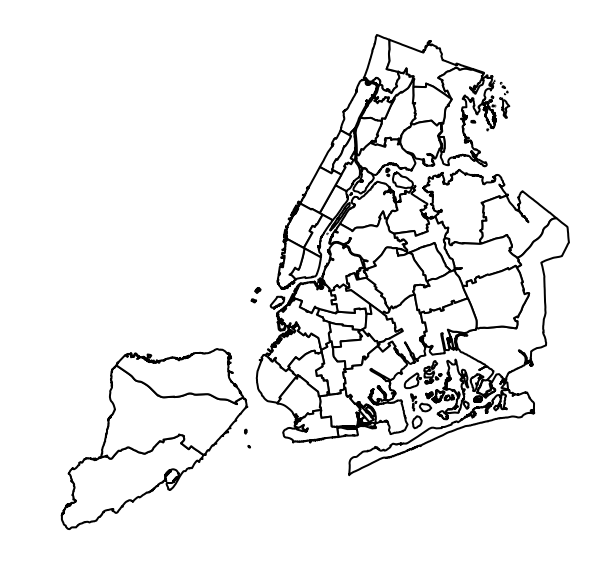

In [164]:
cp.choroplethNYC(pumashp, column=None, color='white', edgecolor='black', lw=2)

In [170]:
pumashp1 = pumashp.iloc[0:4:, :]

In [196]:
pumashp2 = pumashp[pumashp.puma.isin(['3701','3702','3703','3704','3705','3706','3707','3708','3709', '3710','3801','3802','3803','3804','3805','3806','3807','3808','3809','3810'])]

In [197]:
pumashp2

,puma,shape_area,shape_leng,geometry
0,3701,9.792852e+07,53227.144461,POLYGON ((-73.89641133483133 40.90450452082026...
1,3702,1.889860e+08,106050.002302,"POLYGON ((-73.8442314689986 40.86942035096838,..."
2,3703,2.670137e+08,304071.257466,(POLYGON ((-73.78833349834532 40.8346671297593...
3,3704,1.062129e+08,47970.901277,"POLYGON ((-73.84792614069238 40.8713422330779,..."
6,3705,1.224951e+08,68657.316149,POLYGON ((-73.87359713633828 40.83979855593596...
7,3706,4.388687e+07,51799.404183,"POLYGON ((-73.88785196328796 40.8721141761279,..."
8,3707,4.228113e+07,37347.925798,"POLYGON ((-73.89735765412577 40.8587627349268,..."
10,3708,5.589695e+07,34852.437966,POLYGON ((-73.91046008330409 40.84279164297445...
11,3709,1.241177e+08,73288.964465,(POLYGON ((-73.83667856364177 40.8175887629137...
12,3710,1.377966e+08,91086.012338,(POLYGON ((-73.89680883223774 40.7958084451597...


(<matplotlib.figure.Figure at 0x7fed6f613ac8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fed682004a8>)

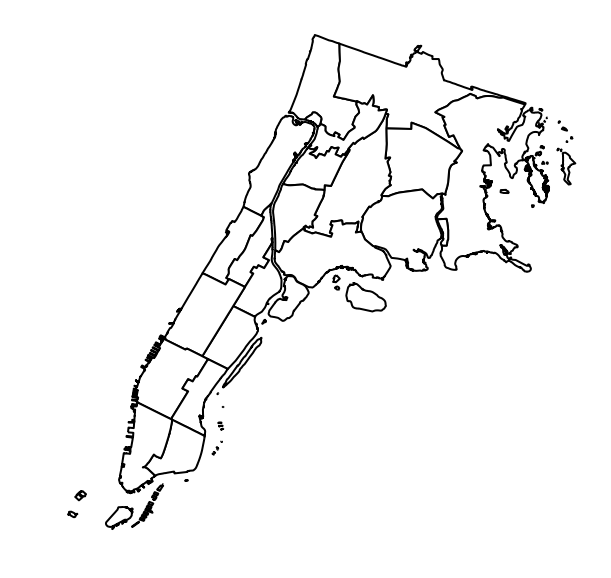

In [198]:
cp.choroplethNYC(pumashp2, column=None, color='white', edgecolor='black', lw=2)

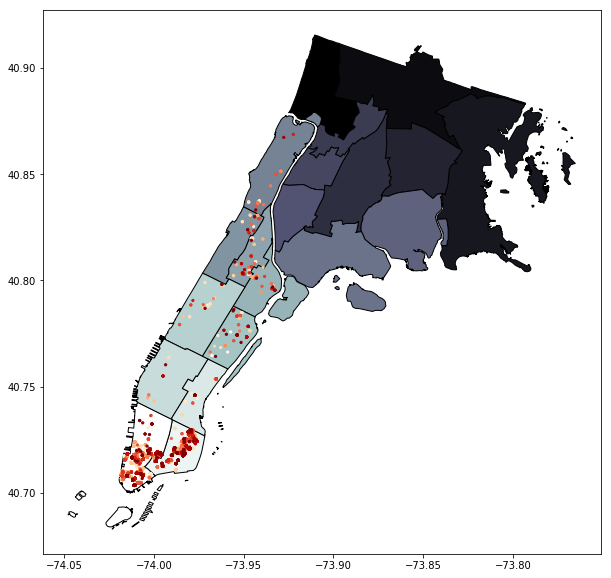

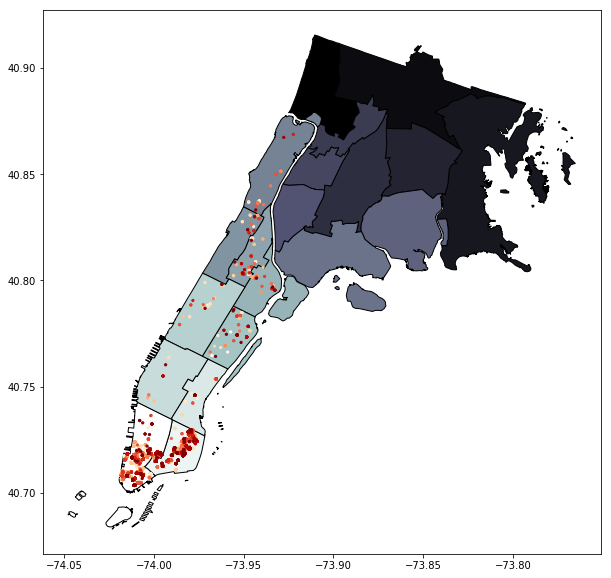

In [202]:
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(111)
p = pumashp2.plot(column=None, scheme='equal_interval',ax=ax, k=5, edgecolor="black", cmap='bone')
df.plot(ax=ax, marker='o', c="price", 
             markersize=5, cmap="OrRd");

ax.get_figure()

(<matplotlib.figure.Figure at 0x7fed610a59b0>,
 <matplotlib.colorbar.Colorbar at 0x7fed6632d5c0>)

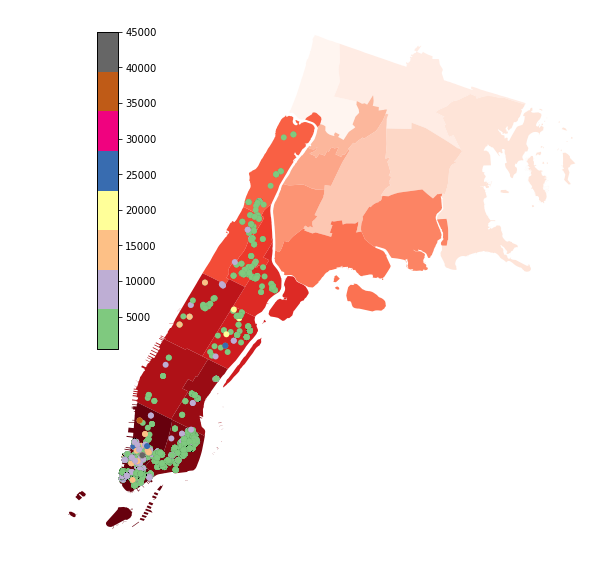

In [200]:
fig, ax = cp.choroplethNYC(pumashp2, column=None, scheme='Equal_interval', cmap='Reds', edgecolor='black')
cp.choroplethNYC(df, column='price',  
             cmap="Accent", lw=0.01, edgecolor='black', ax=ax)